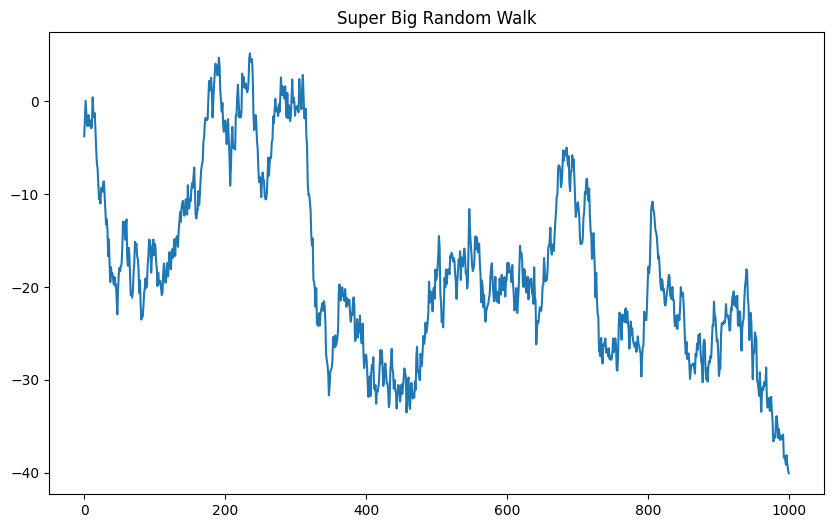

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y = np.random.normal(0,1.5,1000).cumsum()

plt.figure(figsize=(10,6))
plt.plot(y)
plt.title('Super Big Random Walk')
plt.show()

In [2]:
#turn the series into a suitable sf dataframe
series = pd.DataFrame({'y': y, 'unique_id': 0, 'ds': range(0, len(y))})
series

,y,unique_id,ds
0,-3.782720,0,0
1,-1.944218,0,1
2,0.051425,0,2
3,-1.309020,0,3
4,-2.556319,0,4
...,...,...,...
995,-39.138049,0,995
996,-38.120100,0,996
997,-39.091365,0,997
998,-39.715166,0,998


In [3]:
from statsforecast.core import StatsForecast
from statsforecast.models import ( 
    AutoARIMA,
    AutoETS
)


sf = StatsForecast(
    models=[AutoETS(season_length=7)],
    freq=1
)

#sf.forecast(df=series, h=7).head() #to see if it works

In [8]:
import ray
import logging

ray.init(logging_level=logging.ERROR)

series = series.reset_index()
series['unique_id'] = series['unique_id'].astype(str)
ctx = ray.data.context.DatasetContext.get_current()
ctx.use_streaming_executor = False
ray_series = ray.data.from_pandas(series).repartition(4)

sf.forecast(df=ray_series, h=7).take(5)

SyntaxError: invalid syntax (2933773233.py, line 2)